# Part B

In this exercise, we will use the full text of the works of William Shakespeare, taken from the Folger Shakespeare Library, available via a Creative Commmons Attribution-NonCommercial 3.0 Unported License. Sp that you can avoid having to download all the texts yourselves, these have been made available to you on my webpage. However, this means that you must have internet access to run the provided code in this notebook successfully.

"Download Shakespeare's Plays, Sonnets, and Poems.” Folger Shakespeare Library. Accessed on Date. https://www.folger.edu/explore/shakespeares-works/download/

# Question 1

The goal is to make the creation of the word clouds run in parallel. Look below for the code which looks like

```Python
%%time
images = map(path_to_wordcloud, paths)
images = list(images)

```

This code should run in parallel. However, you may have to alter other code blocks (avoiding those which we indicate should not be altered) to enable this.

Use comments reading `# MODIFIED` to indicate any code cells you have changed and `# NEW` to indicate any code cells you have added. Additional comments indicating what you have done are also helpful.

In [81]:
numTexts = 12

In [82]:
# DO NOT alter anything in this cell! (Lone exception: you may comment or uncomment the very last line)

import os, random

basefiles = ['a-midsummer-nights-dream_TXT_FolgerShakespeare.txt',
 'alls-well-that-ends-well_TXT_FolgerShakespeare.txt',
 'antony-and-cleopatra_TXT_FolgerShakespeare.txt',
 'as-you-like-it_TXT_FolgerShakespeare.txt',
 'coriolanus_TXT_FolgerShakespeare.txt',
 'cymbeline_TXT_FolgerShakespeare.txt',
 'hamlet_TXT_FolgerShakespeare.txt',
 'henry-iv-part-1_TXT_FolgerShakespeare.txt',
 'henry-iv-part-2_TXT_FolgerShakespeare.txt',
 'henry-vi-part-1_TXT_FolgerShakespeare.txt',
 'henry-vi-part-2_TXT_FolgerShakespeare.txt',
 'henry-vi-part-3_TXT_FolgerShakespeare.txt',
 'henry-viii_TXT_FolgerShakespeare.txt',
 'henry-v_TXT_FolgerShakespeare.txt',
 'julius-caesar_TXT_FolgerShakespeare.txt',
 'king-john_TXT_FolgerShakespeare.txt',
 'king-lear_TXT_FolgerShakespeare.txt',
 'loves-labors-lost_TXT_FolgerShakespeare.txt',
 'lucrece_TXT_FolgerShakespeare.txt',
 'macbeth_TXT_FolgerShakespeare.txt',
 'measure-for-measure_TXT_FolgerShakespeare.txt',
 'much-ado-about-nothing_TXT_FolgerShakespeare.txt',
 'othello_TXT_FolgerShakespeare.txt',
 'pericles_TXT_FolgerShakespeare.txt',
 'richard-iii_TXT_FolgerShakespeare.txt',
 'richard-ii_TXT_FolgerShakespeare.txt',
 'romeo-and-juliet_TXT_FolgerShakespeare.txt',
 'shakespeares-sonnets_TXT_FolgerShakespeare.txt',
 'the-comedy-of-errors_TXT_FolgerShakespeare.txt',
 'the-merchant-of-venice_TXT_FolgerShakespeare.txt',
 'the-merry-wives-of-windsor_TXT_FolgerShakespeare.txt',
 'the-phoenix-and-turtle_TXT_FolgerShakespeare.txt',
 'the-taming-of-the-shrew_TXT_FolgerShakespeare.txt',
 'the-tempest_TXT_FolgerShakespeare.txt',
 'the-two-gentlemen-of-verona_TXT_FolgerShakespeare.txt',
 'the-two-noble-kinsmen_TXT_FolgerShakespeare.txt',
 'the-winters-tale_TXT_FolgerShakespeare.txt',
 'timon-of-athens_TXT_FolgerShakespeare.txt',
 'titus-andronicus_TXT_FolgerShakespeare.txt',
 'troilus-and-cressida_TXT_FolgerShakespeare.txt',
 'twelfth-night_TXT_FolgerShakespeare.txt',
 'venus-and-adonis_TXT_FolgerShakespeare.txt']

paths = ['https://pages.cpsc.ucalgary.ca/~lewu/608/A1/' + i for i in random.sample(basefiles, k = numTexts)]

# You may uncomment the print statement below to understand what is part of your paths list.

#print (paths)

In [83]:
import urllib.request
from multiprocessing.pool import ThreadPool as Pool
import multiprocessing
from pathlib import Path
from wordcloud import WordCloud

def read_file_or_url(path):
    return urllib.request.urlopen(path).read().decode('utf-8')

def path_to_wordcloud(path):
    text = read_file_or_url(path)
    wordcloud = WordCloud(width=400,height=400,random_state=0).generate(text)
    return wordcloud

In [84]:
%%time
# NEW
with Pool(4) as pool:
    images = pool.map(path_to_wordcloud, paths)
    images = list(images)

CPU times: user 6.51 s, sys: 846 ms, total: 7.35 s
Wall time: 7.48 s


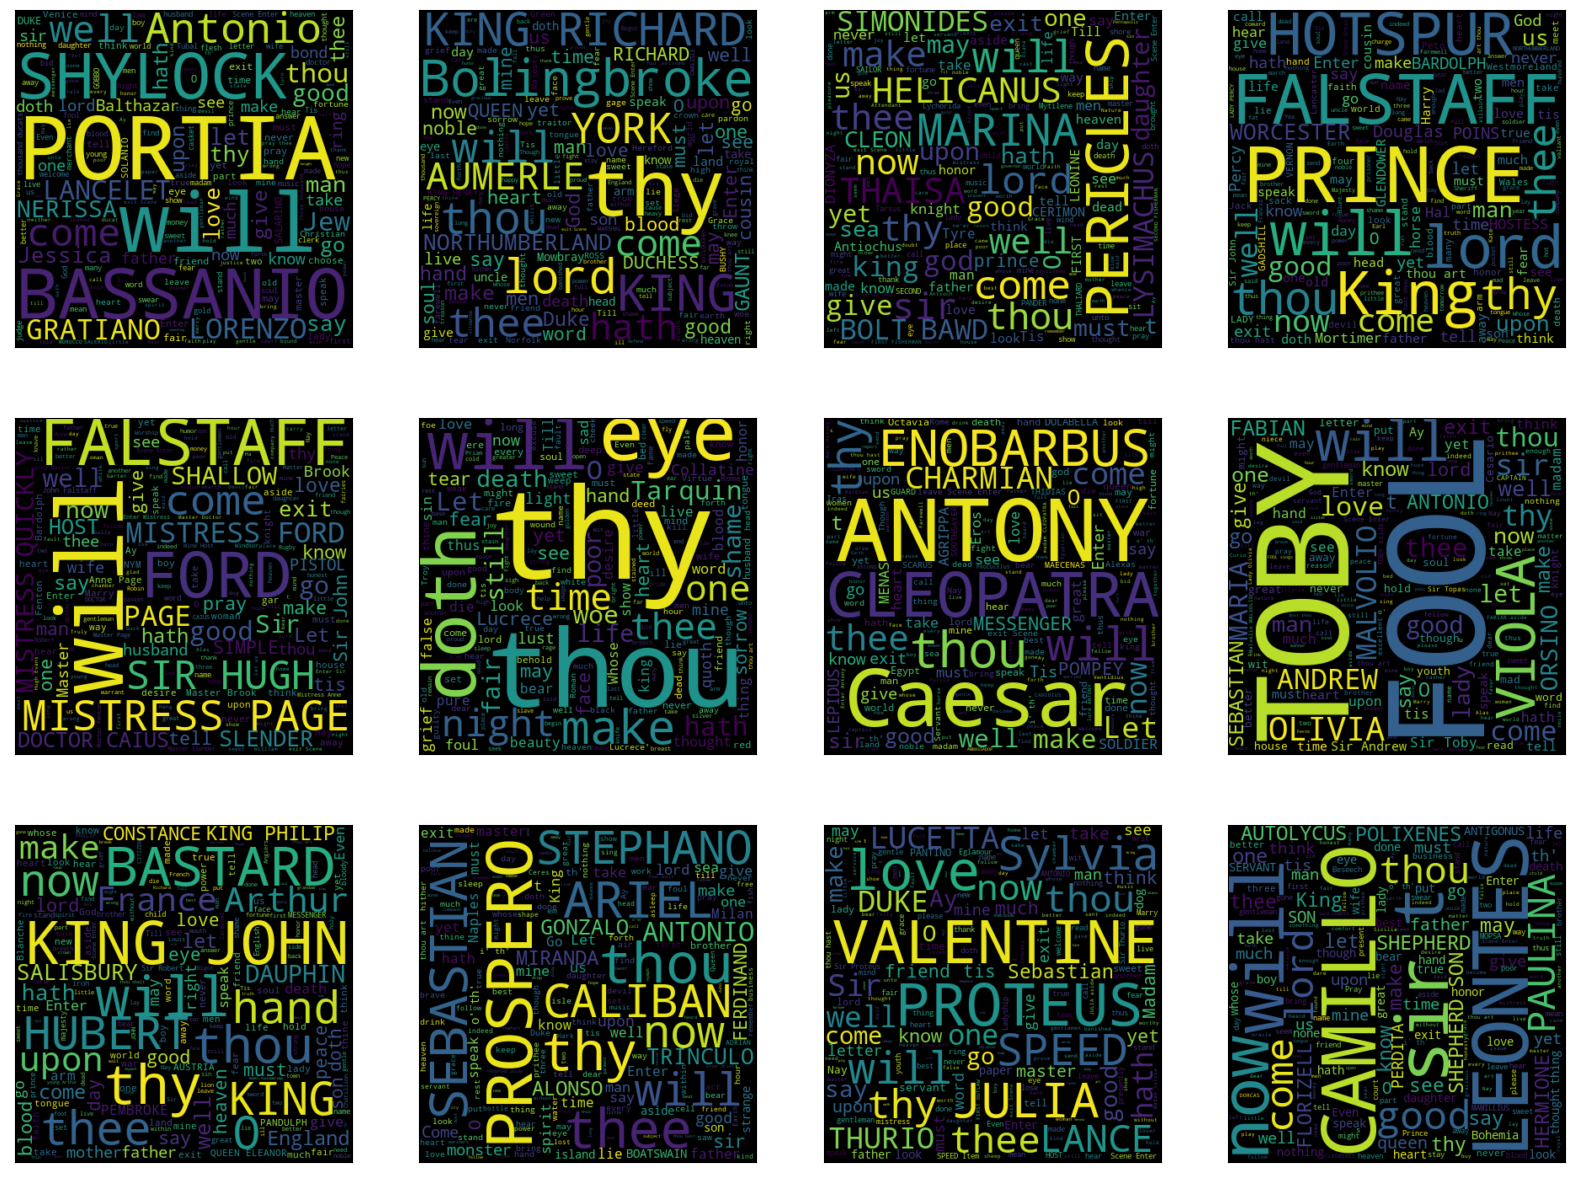

In [85]:
# do not alter the code. This is only here to help you visualize the word clouds.

%matplotlib inline

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

ncols = 4
nrows = (len(images) - 1) // ncols + 1
figw = 20 # in inches
fig, axs = plt.subplots(nrows, ncols, figsize=(figw, figw / ncols * nrows), squeeze=False)
i = 0
for row in range(nrows):
    for col in range(ncols):
        axs[row][col].grid(False)
        axs[row][col].set_xticks([])
        axs[row][col].set_yticks([])
        if i < len(images):
            axs[row][col].imshow(images[i], interpolation='bilinear')
        i = i + 1
plt.show()

## Question 2

What is the effect of using processes to parallelize your code compared to using threads?



In [86]:
%%time
# NEW
with Pool(4) as pool:
    images = pool.map(path_to_wordcloud, paths)
    images = list(images)

CPU times: user 6.65 s, sys: 867 ms, total: 7.51 s
Wall time: 7.58 s


In [88]:
%%time
# NEW
import multiprocessing

transformed_paths = []
for i in paths:
    transformed_paths.append((i,))

pools = multiprocessing.Pool(processes=4)
results = pool.starmap(path_to_wordcloud, transformed_paths)

images = results

CPU times: user 13.1 ms, sys: 49.1 ms, total: 62.2 ms
Wall time: 6.29 s


**Answer**:

It seems like using multiple processes is much faster than using thread pools. However it is likely that the results are skewed in some way, as this is being run on the Data Science Hub server.

## Question 3

Share one way in which you could improve the running of this test. You may consider (but are not limited to) your runtime environment, the test data provided, or the manner in which this test was run.

**Answer**:

As of right now, I can only install the wordcloud library on the Data Science Hub. Because the Data Science Hub is it's own server, it gives results when implementing parellel computing in the code. I could improve the tests if I were able to run the code on my local machine as I would not be sharing computing resources with others accessing the Data Science Hub.